### Phase 2: Conduct EDA and model construction using the master_math.csv file that contains all relevant features and target variable

#### Importing all necessary libraries

In [134]:
import pandas
pandas.__version__
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, learning_curve, cross_val_predict
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.pipeline import Pipeline
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [135]:
#pip install --user scikit-learn

In [136]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/MASTER

C:\Users\dansa\Documents\GitHub\Phase1\Data\MASTER


#### Loading the data and reformatting the school id column

In [137]:
master_math_new = pandas.read_csv("master_math.csv")
master_math_new['NCESSCH'] = master_math_new['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
master_math_new.head()

,SCHOOL_YEAR_x,ST_x,NAME,NCESSCH,LEVEL,SCH_TYPE_TEXT_x,SCH_TYPE_x,TITLEI_STATUS,TITLEI_STATUS_TEXT,TEACHERS,...,Total_AP_math_students,Total_students_tookAP,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students,Income_Poverty_ratio,IPR_SE,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718_new
0,2017-2018,AL,Albertville High School,010000500871,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,77.00,...,53.0,286.0,23.0,23.0,450.0,428.0,248.0,80.0,337.0,37.0
1,2017-2018,AL,Asbury High School,010000600872,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,28.64,...,-18.0,46.0,4.0,4.0,63.0,62.0,241.0,127.0,327.0,34.0
2,2017-2018,AL,Douglas High School,010000600878,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,30.87,...,18.0,244.0,4.0,4.0,117.0,113.0,213.0,51.0,130.0,37.0
3,2017-2018,AL,Kate D Smith DAR High School,010000600883,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,24.04,...,18.0,205.0,4.0,4.0,105.0,105.0,254.0,48.0,106.0,57.0
4,2017-2018,AL,Brindlee Mountain High School,010000601585,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,31.26,...,11.0,102.0,4.0,4.0,161.0,149.0,329.0,150.0,338.0,31.0


In [138]:
master_math_new.shape

(14008, 37)

#### Inspecting the data file

In [139]:
master_math_new.columns

Index(['SCHOOL_YEAR_x', 'ST_x', 'NAME', 'NCESSCH', 'LEVEL', 'SCH_TYPE_TEXT_x',
       'SCH_TYPE_x', 'TITLEI_STATUS', 'TITLEI_STATUS_TEXT', 'TEACHERS',
       'FARMS_COUNT', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APMATHENR_IND_new', 'Total_AP_math_students',
       'Total_students_tookAP', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students',
       'Income_Poverty_ratio', 'IPR_SE', 'ALL_MTH00NUMVALID_1718',
       'ALL_MTH00PCTPROF_1718_new'],
      dtype='object')

Create a data frame with only the needed columns for further analysis

In [140]:
math=pd.DataFrame(master_math_new, columns=[ 'NCESSCH', 'SCH_TYPE_x', 
       'TITLEI_STATUS','TEACHERS', 'FARMS_COUNT', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APMATHENR_IND_new','Total_AP_math_students',
       'Total_students_tookAP', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students',
       'Income_Poverty_ratio','ALL_MTH00PCTPROF_1718_new'])

In [141]:
math.head()

,NCESSCH,SCH_TYPE_x,TITLEI_STATUS,TEACHERS,FARMS_COUNT,Total_enroll_students,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT,FTE_teachers_count,...,SCH_APCOURSES,SCH_APMATHENR_IND_new,Total_AP_math_students,Total_students_tookAP,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students,Income_Poverty_ratio,ALL_MTH00PCTPROF_1718_new
0,010000500871,1,SWELIGSWPROG,77.00,832.0,1449.0,78.17,71.17,7.0,72.88,...,8.0,1.0,53.0,286.0,23.0,23.0,450.0,428.0,248.0,37.0
1,010000600872,1,SWELIGSWPROG,28.64,450.0,547.0,32.00,31.00,1.0,32.00,...,3.0,0.0,-18.0,46.0,4.0,4.0,63.0,62.0,241.0,34.0
2,010000600878,1,SWELIGSWPROG,30.87,429.0,591.0,36.00,36.00,0.0,36.00,...,6.0,1.0,18.0,244.0,4.0,4.0,117.0,113.0,213.0,37.0
3,010000600883,1,SWELIGSWPROG,24.04,211.0,452.0,29.00,29.00,0.0,29.00,...,6.0,1.0,18.0,205.0,4.0,4.0,105.0,105.0,254.0,57.0
4,010000601585,1,SWELIGSWPROG,31.26,415.0,632.0,37.00,36.00,1.0,37.00,...,5.0,1.0,11.0,102.0,4.0,4.0,161.0,149.0,329.0,31.0


In [142]:
math.rename(columns={'NCESSCH':'School_ID', 'SCH_TYPE_x':'School_type','FARMS_COUNT':'No.FARMS_students',
                       'SCH_FTETEACH_TOT':'FTE_teachcount','SCH_FTETEACH_CERT':'Certified_FTE_teachers','SCH_FTETEACH_NOTCERT':
                       'Noncertified_FTE_teachers','Total_SAT_ACT_students':'Students_participate_SAT_ACT','SCH_IBENR_IND_new':'IB_Indicator',
                       'SCH_APENR_IND_new':'AP_Indicator','SCH_APCOURSES':'No.ofAP_courses_offer','SCH_APMATHENR_IND_new':'Students_enroll_inAPMath?',
                       'SCH_MATHCLASSES_ALG':'No.ofAlg1classes','SCH_MATHCERT_ALG':'Alg1_taught_by_certmathteahcers',
                       'ALL_MTH00PCTPROF_1718_new':'Percent_Math_Proficient'}, inplace=True)

In [143]:
math.describe()

,School_type,TEACHERS,No.FARMS_students,Total_enroll_students,FTE_teachcount,Certified_FTE_teachers,Noncertified_FTE_teachers,FTE_teachers_count,SalaryforTeachers,Students_participate_SAT_ACT,...,No.ofAP_courses_offer,Students_enroll_inAPMath?,Total_AP_math_students,Total_students_tookAP,No.ofAlg1classes,Alg1_taught_by_certmathteahcers,Total_Alg1_enroll_students,Total_Alg1_pass_students,Income_Poverty_ratio,Percent_Math_Proficient
count,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,1.400800e+04,14008.000000,...,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000
mean,1.191676,49.968936,390.615434,838.542119,52.016495,50.673053,1.342368,53.391072,2.975585e+06,204.346588,...,5.159552,-2.044118,29.380568,122.044332,11.082953,9.326099,169.377784,131.068961,294.213021,38.624358
std,0.724504,41.098020,440.819215,767.147549,42.356503,41.676728,4.505415,670.731866,2.854494e+06,236.344904,...,11.361498,4.472014,72.475391,212.343966,13.100944,11.906223,177.575449,141.219110,140.299703,23.642336
min,1.000000,0.000000,0.000000,10.000000,0.120000,0.000000,0.000000,0.050000,5.039000e+01,1.000000,...,-9.000000,-9.000000,-18.000000,-18.000000,1.000000,0.000000,-18.000000,-18.000000,48.000000,1.000000
25%,1.000000,18.667500,99.000000,251.000000,19.667500,19.000000,0.000000,18.000000,9.525885e+05,41.000000,...,-9.000000,-9.000000,-18.000000,-18.000000,3.000000,2.000000,41.000000,29.000000,204.000000,20.000000
50%,1.000000,36.500000,225.000000,550.000000,38.000000,37.000000,0.000000,35.000000,1.961141e+06,114.000000,...,5.000000,1.000000,8.000000,32.000000,7.000000,6.000000,102.000000,79.000000,263.000000,37.000000
75%,1.000000,73.565000,521.250000,1265.000000,76.307500,74.307500,1.000000,69.950000,4.261760e+06,287.000000,...,13.000000,1.000000,45.000000,171.000000,15.000000,13.000000,245.000000,193.000000,343.000000,52.000000
max,4.000000,302.000000,4329.000000,4996.000000,361.000000,361.000000,157.000000,79297.760000,2.973278e+07,2788.000000,...,82.000000,1.000000,1522.000000,3162.000000,472.000000,472.000000,1523.000000,1345.000000,979.000000,99.000000


In [144]:
print(math.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14008 entries, 0 to 14007
Data columns (total 25 columns):
School_ID                          14008 non-null object
School_type                        14008 non-null int64
TITLEI_STATUS                      14008 non-null object
TEACHERS                           14008 non-null float64
No.FARMS_students                  14008 non-null float64
Total_enroll_students              14008 non-null float64
FTE_teachcount                     14008 non-null float64
Certified_FTE_teachers             14008 non-null float64
Noncertified_FTE_teachers          14008 non-null float64
FTE_teachers_count                 14008 non-null float64
SalaryforTeachers                  14008 non-null float64
Students_participate_SAT_ACT       14008 non-null float64
IB_Indicator                       14008 non-null float64
Total_IB_students                  14008 non-null float64
AP_Indicator                       14008 non-null float64
No.ofAP_courses_offer    

We have 14,008 entries and no null values in any column. There are 25 columns, but we can drop the school_id and we'll want to split off the Percent_Math_Proficient.
The object type features should be strings.

Let's take a quick look at some of the data.

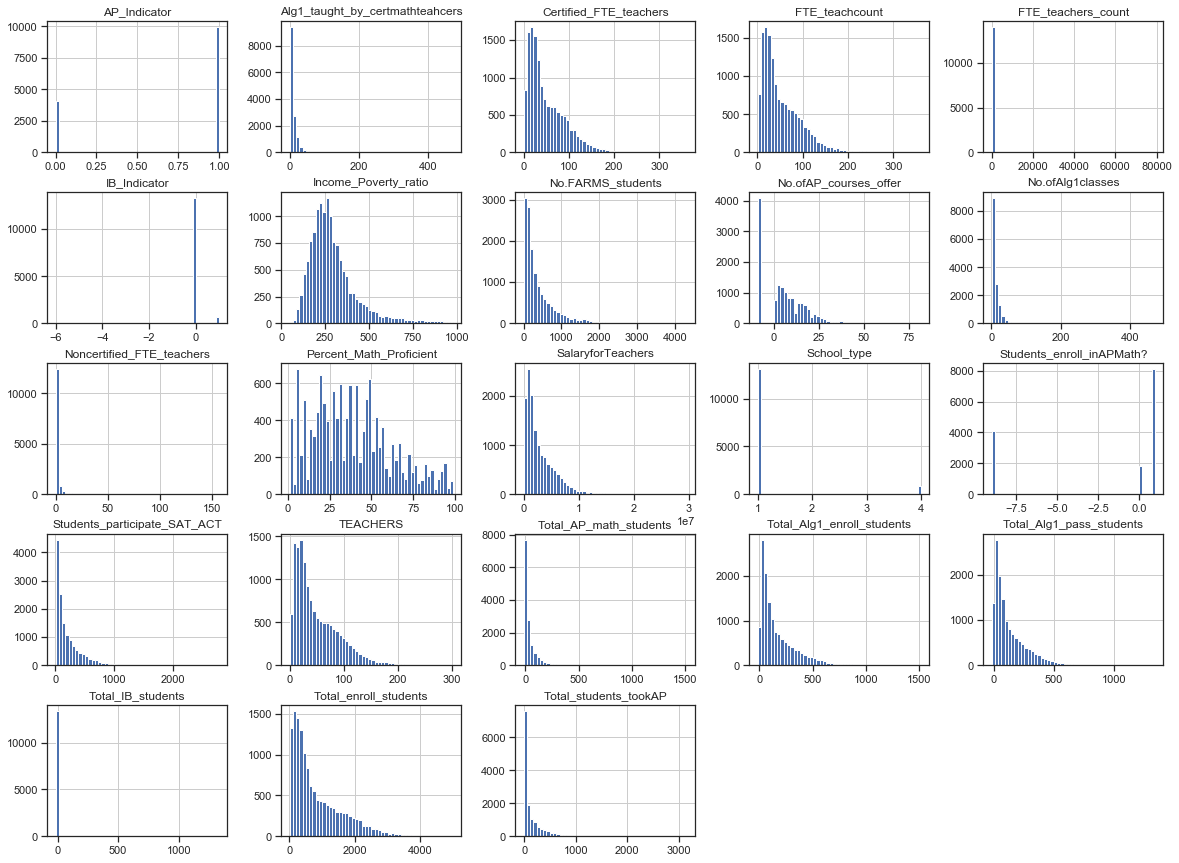

In [145]:
math.hist(bins=50, figsize=(20,15))
plt.show()

We can see that some features have most of their instances at or near zero and relatively few instances at higher values, in some cases much higher. Other features cluster close to zero and have long tails. We also see the percent_math_proficient is almost normally distributed.

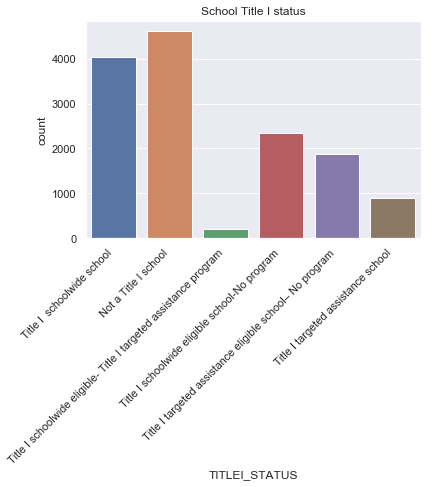

In [147]:
sns.set_style('darkgrid')
_plt = sns.countplot(x='TITLEI_STATUS', data=math)
_plt.set_title('School Title I status')
_plt.set_xticklabels(['Title I  schoolwide school','Not a Title I school','Title I schoolwide eligible- Title I targeted assistance program','Title I schoolwide eligible school-No program','Title I targeted assistance eligible school– No program','Title I targeted assistance school'])
_plt.set_xticklabels(_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/dansa/Documents/Title1_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()

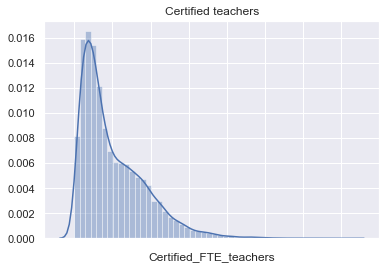

In [148]:
sns.set_style('darkgrid')
cert=math['Certified_FTE_teachers']
_plt = sns.distplot(cert)
_plt.set_title('Certified teachers')
_plt.set_xticklabels(_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/dansa/Documents/Certified_FTE_teachers_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()


 mu = 38.62 and sigma = 23.64



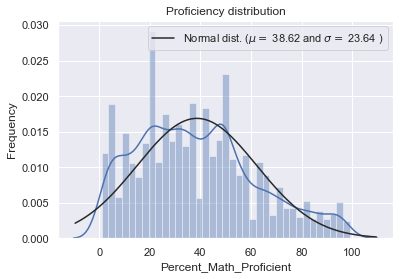

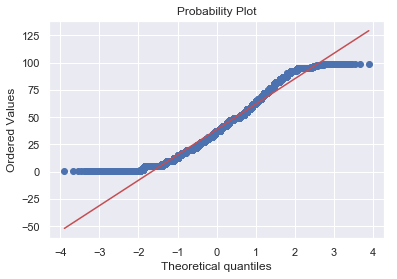

Skewness: 0.491321
Kurtosis: -0.409756


In [149]:
# Plot Histogram
sns.distplot(math['Percent_Math_Proficient'] , fit=norm);
# weights = np.ones_like(np.array(math['Percent_Math_Proficient']))/float(len(np.array(math['Percent_Math_Proficient'])))
# plt.hist(math['Percent_Math_Proficient'], weights=weights, bins = 100)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(math['Percent_Math_Proficient'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Proficiency distribution')

fig = plt.figure()
res = stats.probplot(math['Percent_Math_Proficient'], plot=plt)
plt.show()

print("Skewness: %f" % math['Percent_Math_Proficient'].skew())
print("Kurtosis: %f" % math['Percent_Math_Proficient'].kurt())

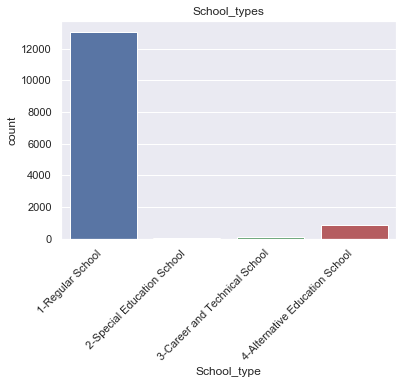

In [150]:
sns.set_style('darkgrid')
Type_plt = sns.countplot(x='School_type', data=math)
Type_plt.set_title('School_types')
Type_plt.set_xticklabels(Type_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
Type_plt.set_xticklabels(["1-Regular School", "2-Special Education School", "3-Career and Technical School", "4-Alternative Education School"])
plt.savefig('/Users/dansa/Documents/Type_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()

In [151]:
math['Pct_certified_teachers']=(math['Certified_FTE_teachers']/math['FTE_teachcount']*100) # lets find the percent of certified teachers

In [152]:
math['Pct_noncertified_teachers']=(math['Noncertified_FTE_teachers']/math['FTE_teachcount']*100) # lets find the percent of noncertified teachers

In [153]:
math['Salary_perFTE_teacher'] = math['SalaryforTeachers']/math['FTE_teachers_count'] # Lets find the salary per FTE in each school

In [154]:
math['IPR_estimate'] = math['Income_Poverty_ratio'] #Income poverty ratio is reported as a percent 

In [155]:
#math['Percent_Reading_Proficient'] = math['Percent_Reading_Proficient']/100

In [156]:
math_clean=math.drop(['School_ID','Certified_FTE_teachers', 'Noncertified_FTE_teachers','FTE_teachcount','FTE_teachers_count','SalaryforTeachers','Income_Poverty_ratio' ], axis=1)

In [157]:
math_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14008 entries, 0 to 14007
Data columns (total 22 columns):
School_type                        14008 non-null int64
TITLEI_STATUS                      14008 non-null object
TEACHERS                           14008 non-null float64
No.FARMS_students                  14008 non-null float64
Total_enroll_students              14008 non-null float64
Students_participate_SAT_ACT       14008 non-null float64
IB_Indicator                       14008 non-null float64
Total_IB_students                  14008 non-null float64
AP_Indicator                       14008 non-null float64
No.ofAP_courses_offer              14008 non-null float64
Students_enroll_inAPMath?          14008 non-null float64
Total_AP_math_students             14008 non-null float64
Total_students_tookAP              14008 non-null float64
No.ofAlg1classes                   14008 non-null float64
Alg1_taught_by_certmathteahcers    14008 non-null float64
Total_Alg1_enroll_studen

In [158]:
math_clean.describe()

,School_type,TEACHERS,No.FARMS_students,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inAPMath?,...,Total_students_tookAP,No.ofAlg1classes,Alg1_taught_by_certmathteahcers,Total_Alg1_enroll_students,Total_Alg1_pass_students,Percent_Math_Proficient,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate
count,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,...,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000
mean,1.191676,49.968936,390.615434,838.542119,204.346588,0.051613,-7.215377,0.708666,5.159552,-2.044118,...,122.044332,11.082953,9.326099,169.377784,131.068961,38.624358,97.248008,2.751456,59489.631974,294.213021
std,0.724504,41.098020,440.819215,767.147549,236.344904,0.227929,65.986916,0.454393,11.361498,4.472014,...,212.343966,13.100944,11.906223,177.575449,141.219110,23.642336,8.031208,7.949134,19111.694230,140.299703
min,1.000000,0.000000,0.000000,10.000000,1.000000,-6.000000,-18.000000,0.000000,-9.000000,-9.000000,...,-18.000000,1.000000,0.000000,-18.000000,-18.000000,1.000000,0.000000,0.000000,1.380548,48.000000
25%,1.000000,18.667500,99.000000,251.000000,41.000000,0.000000,-18.000000,0.000000,-9.000000,-9.000000,...,-18.000000,3.000000,2.000000,41.000000,29.000000,20.000000,98.113208,0.000000,47451.483043,204.000000
50%,1.000000,36.500000,225.000000,550.000000,114.000000,0.000000,-18.000000,1.000000,5.000000,1.000000,...,32.000000,7.000000,6.000000,102.000000,79.000000,37.000000,100.000000,0.000000,55879.476042,263.000000
75%,1.000000,73.565000,521.250000,1265.000000,287.000000,0.000000,-18.000000,1.000000,13.000000,1.000000,...,171.000000,15.000000,13.000000,245.000000,193.000000,52.000000,100.000000,1.886792,67853.414542,343.000000
max,4.000000,302.000000,4329.000000,4996.000000,2788.000000,1.000000,1335.000000,1.000000,82.000000,1.000000,...,3162.000000,472.000000,472.000000,1523.000000,1345.000000,99.000000,179.153094,100.000000,248541.032579,979.000000


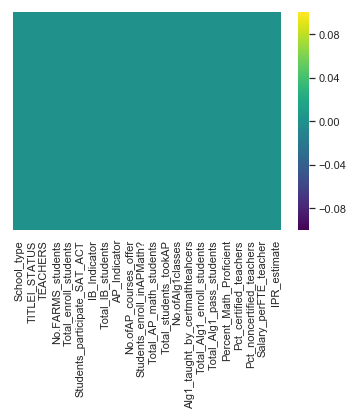

In [159]:
sns.heatmap(math_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [160]:
math_clean.shape

(14008, 22)

### 3. Looking for Correlations and Visualizing
We should calculate data correlations and plot a scatter matrix.

For training the ML models, we'll want to separate the Percent_Math_Proficient from the rest of the data. But for investigating correlations, we'll want to include the target.

In [161]:
math_clean=math_clean[['School_type', 'TITLEI_STATUS', 'TEACHERS', 'No.FARMS_students',
       'Total_enroll_students', 'Students_participate_SAT_ACT', 'IB_Indicator',
       'Total_IB_students', 'AP_Indicator', 'No.ofAP_courses_offer',
       'Students_enroll_inAPMath?', 'Total_AP_math_students','Total_students_tookAP', 
       'No.ofAlg1classes','Alg1_taught_by_certmathteahcers', 'Total_Alg1_enroll_students','Total_Alg1_pass_students',
       'Pct_certified_teachers', 'Pct_noncertified_teachers',
       'Salary_perFTE_teacher', 'IPR_estimate','Percent_Math_Proficient']]

In [162]:
correlation_matrix = math_clean.corr()

In [163]:
correlation_matrix['Percent_Math_Proficient'].sort_values(ascending=False)

Percent_Math_Proficient            1.000000
IPR_estimate                       0.328901
Total_students_tookAP              0.219053
Total_AP_math_students             0.200366
No.ofAP_courses_offer              0.175598
Students_participate_SAT_ACT       0.152417
Salary_perFTE_teacher              0.149208
TEACHERS                           0.140275
Students_enroll_inAPMath?          0.114406
AP_Indicator                       0.110699
Total_enroll_students              0.099781
Pct_certified_teachers             0.088480
Alg1_taught_by_certmathteahcers    0.048307
Total_Alg1_pass_students           0.041406
IB_Indicator                       0.008315
Total_IB_students                  0.003276
Total_Alg1_enroll_students        -0.005832
No.ofAlg1classes                  -0.011504
Pct_noncertified_teachers         -0.089841
No.FARMS_students                 -0.138911
School_type                       -0.146877
Name: Percent_Math_Proficient, dtype: float64

It seems like a few features (IPR_estimate, No.ofAP_courses_offer, Total_AP_math_students have a weak to moderate positive correlation to the target (Percent_Math_Proficient), and a couple are somewhat negatively correlated (School_type).

IPR_estimate is the Neighborhood Income Poverty Ratio.
No.ofAP_courses_offer is the count of AP courses offered at the school.
Total_AP_math_students is the number of students who took an AP math course.
School_type is refers to whether the school is a "1-Regular School, 2-Special Education School, 3-Career and Technical School and 4-Alternative Education School"

We can look at a heatmap of the correlations of all numeric features to visualize which features are correlated.

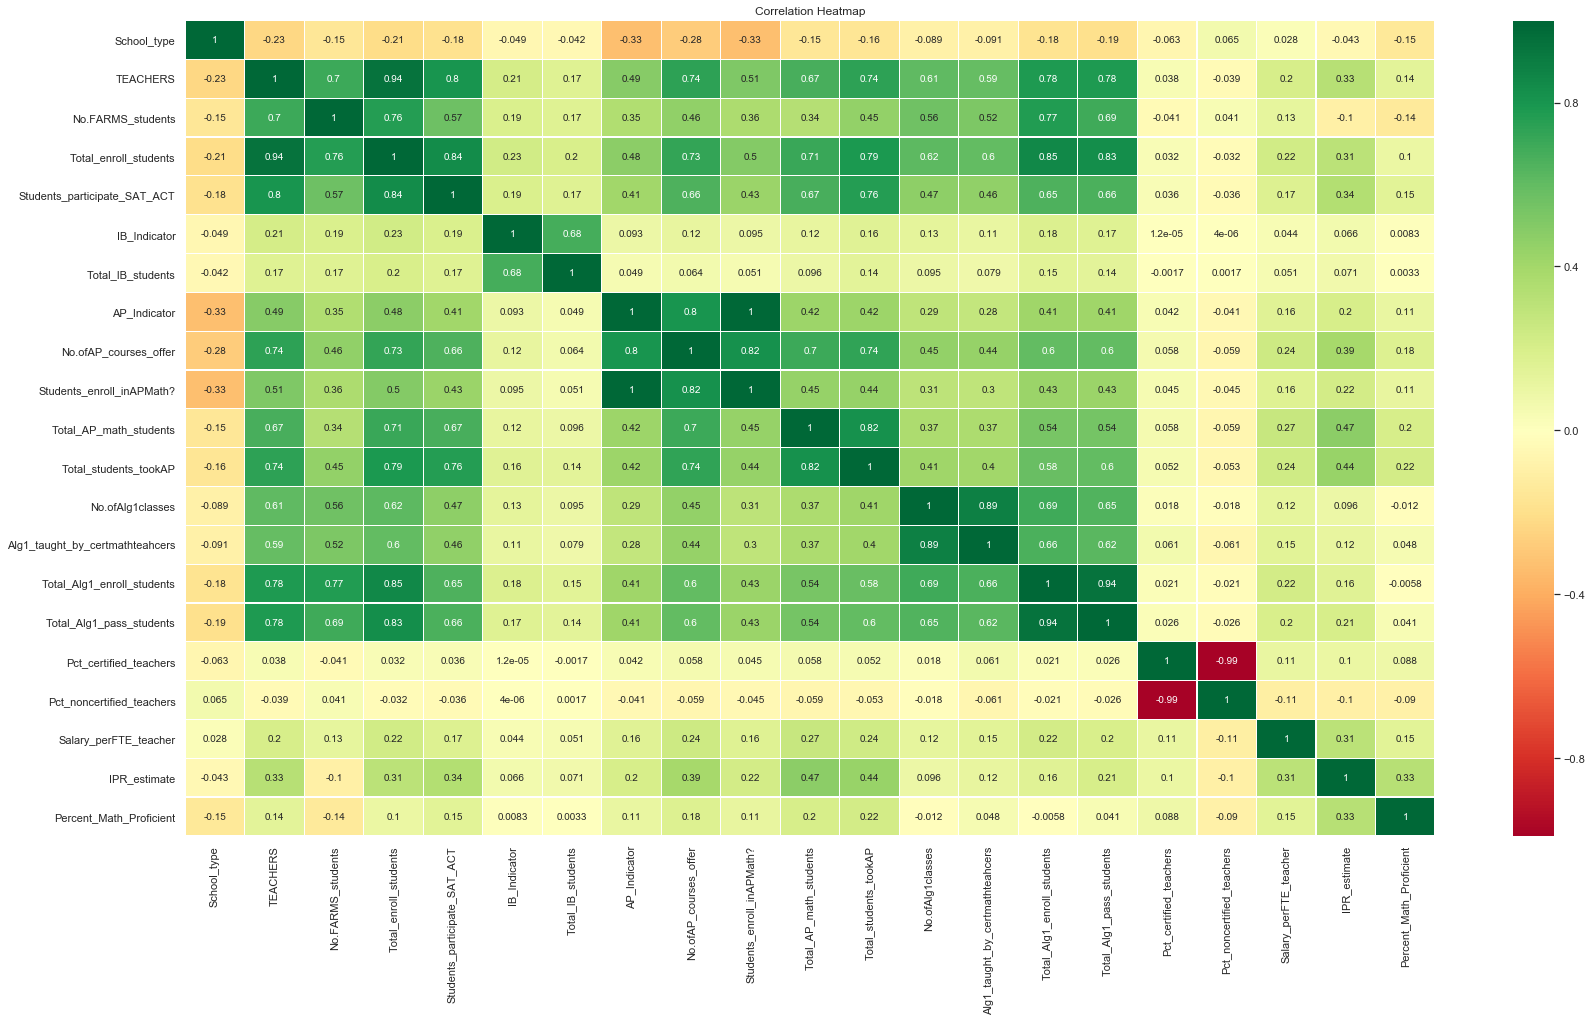

In [164]:
# correlation matrix heatmap
plt.figure(figsize=(28,15))
corr_heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0.2, center=0, cmap="RdYlGn")
corr_heatmap.set_title('Correlation Heatmap')
plt.savefig('/Users/dansa/Documents/corr_heatmap.png', dpi=300, bbox_inches='tight')

In [165]:
#test
corr_pairs = {}
feats = correlation_matrix.columns
for x in feats:
    for y in feats:
        if x != y and np.abs(correlation_matrix[x][y]) >= 0.7:  # which pairs are strongely correlated?
            if (y, x) not in corr_pairs.keys():
                corr_pairs[(x, y)] = correlation_matrix[x][y]

In [166]:
corr_pairs

{('TEACHERS', 'No.FARMS_students'): 0.7040281676604002,
 ('TEACHERS', 'Total_enroll_students'): 0.9390549023197802,
 ('TEACHERS', 'Students_participate_SAT_ACT'): 0.8020496858506069,
 ('TEACHERS', 'No.ofAP_courses_offer'): 0.7381516846823742,
 ('TEACHERS', 'Total_students_tookAP'): 0.7422419802052982,
 ('TEACHERS', 'Total_Alg1_enroll_students'): 0.7810961119759187,
 ('TEACHERS', 'Total_Alg1_pass_students'): 0.7797006809381267,
 ('No.FARMS_students', 'Total_enroll_students'): 0.7644109274259803,
 ('No.FARMS_students', 'Total_Alg1_enroll_students'): 0.7690565798712569,
 ('Total_enroll_students', 'Students_participate_SAT_ACT'): 0.8396325414371416,
 ('Total_enroll_students', 'No.ofAP_courses_offer'): 0.726834602814396,
 ('Total_enroll_students', 'Total_AP_math_students'): 0.7123384363088873,
 ('Total_enroll_students', 'Total_students_tookAP'): 0.7896024373354724,
 ('Total_enroll_students', 'Total_Alg1_enroll_students'): 0.8537035166834313,
 ('Total_enroll_students', 'Total_Alg1_pass_stude

In [167]:
weaker_label = []
for pair in corr_pairs:
    if np.abs(correlation_matrix[pair[0]]['Percent_Math_Proficient']) < np.abs(correlation_matrix[pair[1]]['Percent_Math_Proficient']):
        weaker_label.append(pair[0])
    else:
        weaker_label.append(pair[1])

In [168]:
poss_redundant_feats = set(weaker_label)
poss_redundant_feats

{'AP_Indicator',
 'No.FARMS_students',
 'No.ofAP_courses_offer',
 'No.ofAlg1classes',
 'Pct_certified_teachers',
 'Students_enroll_inAPMath?',
 'Students_participate_SAT_ACT',
 'TEACHERS',
 'Total_AP_math_students',
 'Total_Alg1_enroll_students',
 'Total_Alg1_pass_students',
 'Total_enroll_students'}

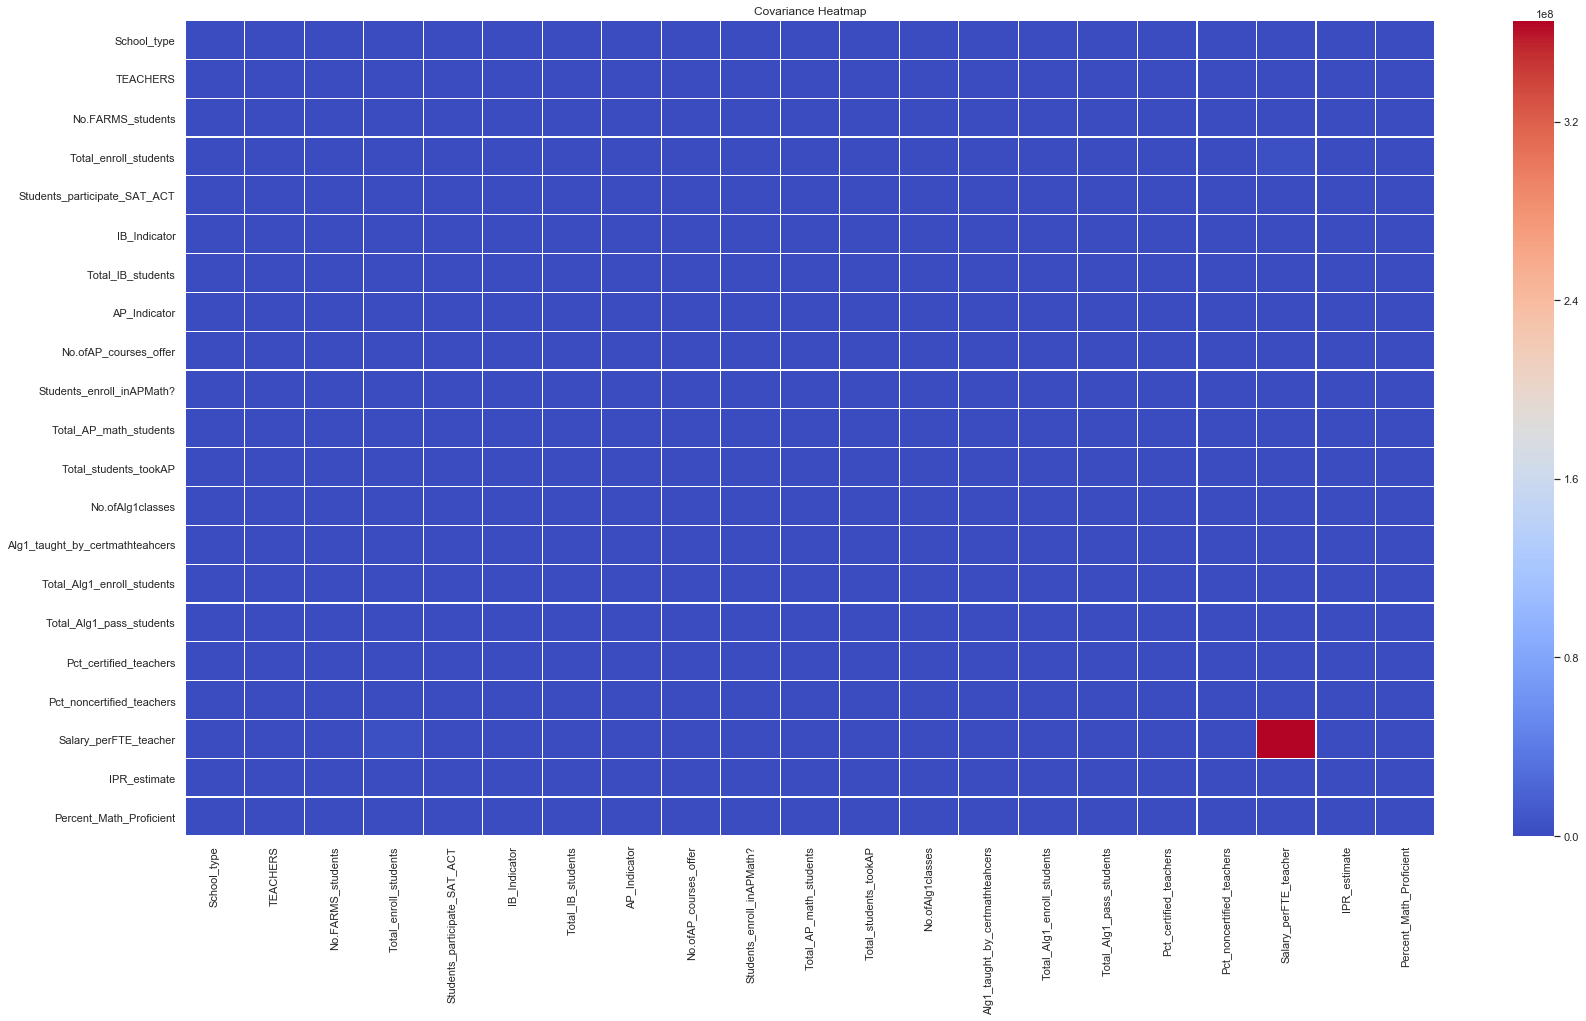

In [169]:
cov_matrix = math_clean.cov()
plt.figure(figsize=(28,15))
covar_heatmap = sns.heatmap(data=cov_matrix, cmap='coolwarm', linewidth=0.2) 
covar_heatmap.set_title('Covariance Heatmap')
plt.savefig('/Users/dansa/Documents/covar_heatmap.png', dpi=300, bbox_inches='tight')

In [170]:
attrs = ['IPR_estimate','Total_AP_math_students','No.ofAP_courses_offer','Percent_Math_Proficient']

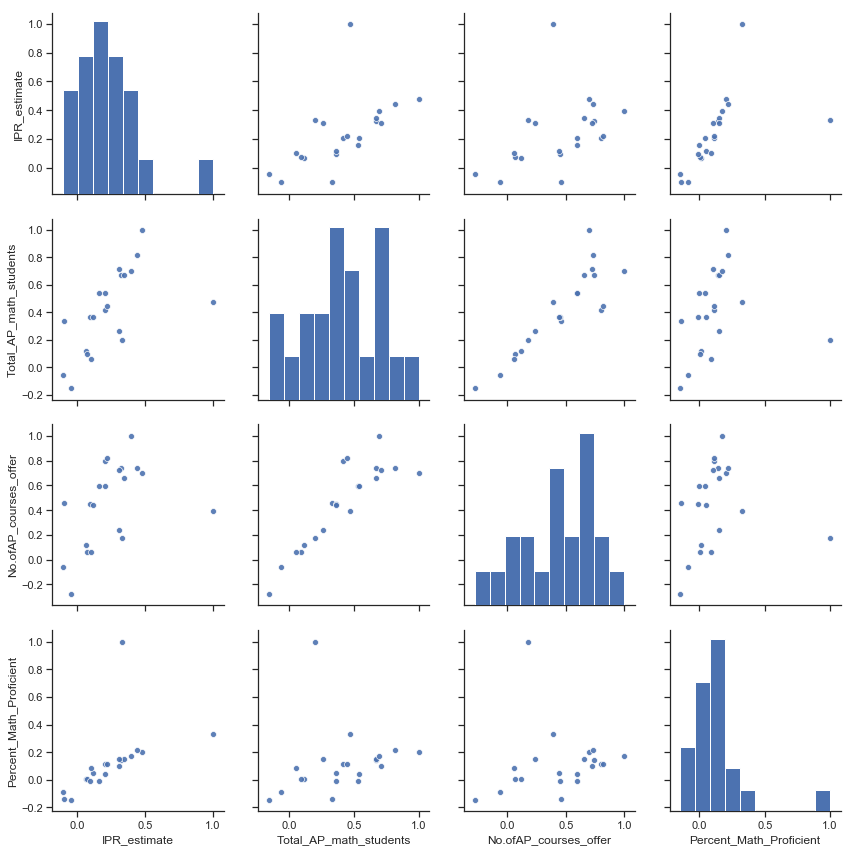

In [171]:
sns.set(style='ticks', color_codes=True)
_ = sns.pairplot(data=correlation_matrix[attrs], height=3, aspect=1, kind='scatter', plot_kws={'alpha':0.9})

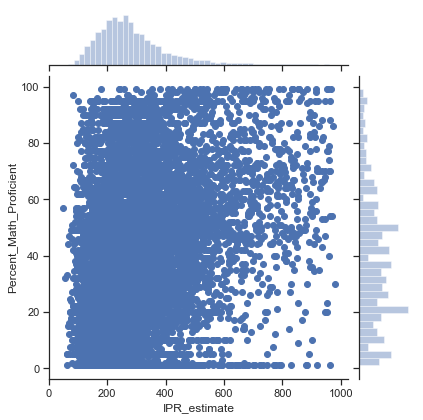

In [172]:
sns.jointplot(x="IPR_estimate", y="Percent_Math_Proficient", data=math_clean)

### ML prep
#### Separate labels
Let's separate out the target from the predicting features.

In [173]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(math_clean, test_size=0.2, random_state=0)

In [174]:
train.shape

(11206, 22)

In [175]:
test.shape

(2802, 22)

In [176]:
math_clean.shape

(14008, 22)

In [177]:
df_X_train = train.drop(['Percent_Math_Proficient'], axis=1)
df_y_train = train['Percent_Math_Proficient'].copy()

df_X_test = test.drop(['Percent_Math_Proficient'], axis=1)
df_y_test = test['Percent_Math_Proficient'].copy()

In [178]:
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11206 entries, 7046 to 2732
Data columns (total 21 columns):
School_type                        11206 non-null int64
TITLEI_STATUS                      11206 non-null object
TEACHERS                           11206 non-null float64
No.FARMS_students                  11206 non-null float64
Total_enroll_students              11206 non-null float64
Students_participate_SAT_ACT       11206 non-null float64
IB_Indicator                       11206 non-null float64
Total_IB_students                  11206 non-null float64
AP_Indicator                       11206 non-null float64
No.ofAP_courses_offer              11206 non-null float64
Students_enroll_inAPMath?          11206 non-null float64
Total_AP_math_students             11206 non-null float64
Total_students_tookAP              11206 non-null float64
No.ofAlg1classes                   11206 non-null float64
Alg1_taught_by_certmathteahcers    11206 non-null float64
Total_Alg1_enroll_stud

#### Transform Categorical Features
Since these categorical features don't appear to have an inherent ordering, let's try encoding them as one-hot vectors for better ML performance.

In [179]:
train_data_onehot = pd.get_dummies(df_X_train, columns=['TITLEI_STATUS'], prefix=['TITLEI_STATUS'])
train_data_onehot.head()

# one-hot the testing set as well
test_data_onehot = pd.get_dummies(df_X_test, columns=['TITLEI_STATUS'], prefix=['TITLEI_STATUS'])


In [180]:
train_data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11206 entries, 7046 to 2732
Data columns (total 26 columns):
School_type                        11206 non-null int64
TEACHERS                           11206 non-null float64
No.FARMS_students                  11206 non-null float64
Total_enroll_students              11206 non-null float64
Students_participate_SAT_ACT       11206 non-null float64
IB_Indicator                       11206 non-null float64
Total_IB_students                  11206 non-null float64
AP_Indicator                       11206 non-null float64
No.ofAP_courses_offer              11206 non-null float64
Students_enroll_inAPMath?          11206 non-null float64
Total_AP_math_students             11206 non-null float64
Total_students_tookAP              11206 non-null float64
No.ofAlg1classes                   11206 non-null float64
Alg1_taught_by_certmathteahcers    11206 non-null float64
Total_Alg1_enroll_students         11206 non-null float64
Total_Alg1_pass_stude

#### Scale Features
We can check out the statistics for each feature, do they need to be normalized?

In [181]:
train_data_onehot.describe()

,School_type,TEACHERS,No.FARMS_students,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inAPMath?,...,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate,TITLEI_STATUS_NOTTITLE1ELIG,TITLEI_STATUS_SWELIGNOPROG,TITLEI_STATUS_SWELIGSWPROG,TITLEI_STATUS_SWELIGTGPROG,TITLEI_STATUS_TGELGBNOPROG,TITLEI_STATUS_TGELGBTGPROG
count,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,...,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000
mean,1.191594,50.163853,391.205693,840.394610,204.238979,0.051223,-7.135285,0.709709,5.211315,-2.030876,...,97.216610,2.782649,59582.141397,295.017580,0.329020,0.165269,0.290112,0.015349,0.134392,0.065858
std,0.724755,41.176063,438.883261,762.595722,234.748767,0.228804,66.963027,0.453917,11.389551,4.469075,...,8.162935,8.061914,19071.159433,141.464588,0.469878,0.371439,0.453834,0.122942,0.341089,0.248044
min,1.000000,0.000000,0.000000,10.000000,1.000000,-6.000000,-18.000000,0.000000,-9.000000,-9.000000,...,0.000000,0.000000,1.380548,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,18.842500,99.000000,255.000000,41.000000,0.000000,-18.000000,0.000000,-9.000000,-9.000000,...,98.101566,0.000000,47446.272166,204.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,36.640000,225.000000,551.000000,114.000000,0.000000,-18.000000,1.000000,5.000000,1.000000,...,100.000000,0.000000,56017.144231,263.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,74.007500,524.750000,1273.750000,289.000000,0.000000,-18.000000,1.000000,13.000000,1.000000,...,100.000000,1.899185,68181.367984,343.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,302.000000,3792.000000,4996.000000,2788.000000,1.000000,1335.000000,1.000000,82.000000,1.000000,...,179.153094,100.000000,242857.142857,979.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
sc= StandardScaler()
train_scaler = sc.fit(train_data_onehot)
test_scaler = sc.fit(test_data_onehot)
#print(train_scaler.mean_)
#print(train_scaler.scale_)

In [183]:
train_data_standardized = train_scaler.transform(train_data_onehot)
test_data_standardized = test_scaler.transform(test_data_onehot)

In [184]:
print(train_data_standardized)
print(train_data_standardized.mean(axis=0))

[[-0.26538564  1.63973978 -0.45321865 ... -0.12185931 -0.39549673
  -0.24445438]
 [-0.26538564  1.85899111  0.40748616 ... -0.12185931 -0.39549673
  -0.24445438]
 [-0.26538564 -0.21384135 -0.05408352 ... -0.12185931 -0.39549673
  -0.24445438]
 ...
 [-0.26538564 -0.34799177 -0.29713229 ... -0.12185931 -0.39549673
  -0.24445438]
 [-0.26538564  1.25004139  3.39319534 ... -0.12185931 -0.39549673
  -0.24445438]
 [-0.26538564 -0.17631847  0.16220759 ... -0.12185931 -0.39549673
   4.09074287]]
[-0.00056935  0.02389804  0.00657988  0.01179698 -0.0022173  -0.00870711
  0.00646555  0.01142374  0.0230105   0.01476509  0.03251966  0.01196287
 -0.01199993  0.01307236  0.0047085   0.00353046 -0.02098499  0.02084837
  0.02400193  0.02968567 -0.00914961 -0.03802046  0.02136564  0.00596717
 -0.0025387   0.04105121]


In [185]:
print(train_data_standardized.std(axis=0))

[1.00169411 1.00978789 0.97858052 0.97136352 0.96750487 1.01965075
 1.08124066 0.99480118 1.01269845 0.99676972 1.06406998 0.99748393
 0.77393697 0.77801929 0.97287208 0.98591313 1.09125654 1.07776798
 0.9897143  1.04402158 0.99671788 0.96704438 1.01015857 1.02381879
 0.99728561 1.07527186]


In [186]:
train_data_std = pd.DataFrame(train_data_standardized, columns=train_data_onehot.columns)
test_data_std = pd.DataFrame(test_data_standardized, columns=test_data_onehot.columns)

In [187]:
train_data_std.describe()

,School_type,TEACHERS,No.FARMS_students,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inAPMath?,...,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate,TITLEI_STATUS_NOTTITLE1ELIG,TITLEI_STATUS_SWELIGNOPROG,TITLEI_STATUS_SWELIGSWPROG,TITLEI_STATUS_SWELIGTGPROG,TITLEI_STATUS_TGELGBNOPROG,TITLEI_STATUS_TGELGBTGPROG
count,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,...,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000,11206.000000
mean,-0.000569,0.023898,0.006580,0.011797,-0.002217,-0.008707,0.006466,0.011424,0.023011,0.014765,...,-0.020985,0.020848,0.024002,0.029686,-0.009150,-0.038020,0.021366,0.005967,-0.002539,0.041051
std,1.001739,1.009833,0.978624,0.971407,0.967548,1.019696,1.081289,0.994846,1.012744,0.996814,...,1.091305,1.077816,0.989758,1.044068,0.996762,0.967088,1.010204,1.023864,0.997330,1.075320
min,-0.265386,-1.206358,-0.865733,-1.045973,-0.839894,-26.976754,-0.168973,-1.544039,-1.240641,-1.539678,...,-13.017902,-0.351170,-3.068131,-1.793408,-0.707107,-0.468317,-0.624404,-0.121859,-0.395497,-0.244454
25%,-0.265386,-0.744251,-0.644982,-0.733888,-0.675028,-0.236987,-0.168973,-1.544039,-1.240641,-1.539678,...,0.097325,-0.351170,-0.605828,-0.642062,-0.707107,-0.468317,-0.624404,-0.121859,-0.395497,-0.244454
50%,-0.265386,-0.307771,-0.364026,-0.356839,-0.374149,-0.236987,-0.168973,0.647652,0.004221,0.690793,...,0.351127,-0.351170,-0.161015,-0.206618,-0.707107,-0.468317,-0.624404,-0.121859,-0.395497,-0.244454
75%,-0.265386,0.608658,0.304358,0.563812,0.347136,-0.236987,-0.168973,0.647652,0.715570,0.690793,...,0.351127,-0.097264,0.470286,0.383816,1.414214,-0.468317,1.601526,-0.121859,-0.395497,-0.244454
max,3.881142,6.200118,7.589689,5.305275,10.647095,4.219641,21.678664,0.647652,6.850958,0.690793,...,10.933128,13.018063,9.535641,5.077764,1.414214,2.135304,1.601526,8.206184,2.528466,4.090743


That should work better, the standard deviation for each feature is 1 and the mean is ~0.

### Using a multiple linear regression model

In [188]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_data_std, df_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [189]:
y_pred = regressor.predict(test_data_std)

In [190]:
from termcolor import colored as cl

In [191]:
print(cl('R-Squared :', attrs = ['bold']), regressor.score(test_data_std, df_y_test))

R-Squared : 0.18684522281571747


In [192]:
# Method 2 Using Statsmodels
import statsmodels.api as sm
from scipy import stats

In [193]:
y = list(df_y_train)

In [194]:
X2 = sm.add_constant(train_data_std) 
# Define the model
est = sm.OLS(y, X2)
# Fit the model
est2 = est.fit()
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

summary()
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:22:23   Log-Likelihood:                -49986.
No. Observations:               11206   AIC:                         1.000e+05
Df Residuals:                   11180   BIC:                         1.002e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

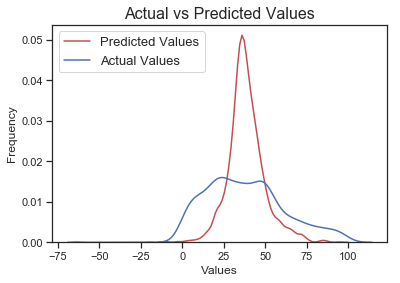

In [195]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(df_y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.savefig('ap.png')

In [196]:
df = pandas.DataFrame({'Actual':  df_y_test, 'Predicted': y_pred})
df

,Actual,Predicted
467,22.0,33.853171
449,22.0,12.604105
1638,48.0,41.640089
9451,10.0,33.967295
10316,27.0,36.944261
1091,20.0,18.918420
12390,41.0,31.317449
10252,20.0,40.377979
6226,1.0,40.471188
5429,52.0,26.867254


In [197]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(df_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_y_test, y_pred)))

Mean Absolute Error: 16.894405693472148
Mean Squared Error: 445.7405762309088
Root Mean Squared Error: 21.11256915277979
